In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [3]:
# 1. Loading and Preprocessing 
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
# Standardizing the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## KMeans Clustering 
**Description**
 
KMeans clustering partitions data into 'k' clusters by minimizing variance within clusters.
It assigns each point to the nearest cluster centroid and updates centroids iteratively.

**Why KMeans is suitable for the Iris dataset**

 - The dataset has well-separated clusters, which aligns with KMeans' assumption of distinct groups.
 - KMeans works well for compact, spherical clusters, which the Iris dataset approximately follows.
 - It is computationally efficient and easy to interpret for small datasets like Iris.


In [31]:
# KMeans Clustering Implementation
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


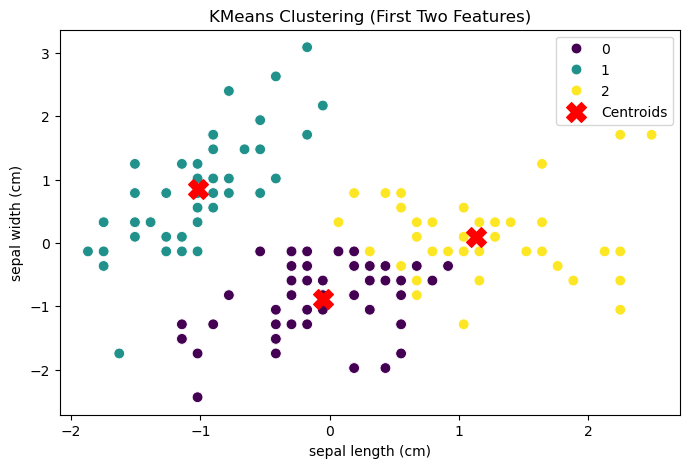

In [33]:
# Visualization of KMeans Clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering (First Two Features)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

## Hierarchical Clustering 
**Description**

Hierarchical clustering builds a tree-like structure by recursively merging or splitting clusters.
It is useful when we need a hierarchy of clusters or don't know the optimal number of clusters.

**Why Hierarchical Clustering is suitable for the Iris dataset**

 - It provides a dendrogram, helping to visualize the clustering structure.
 - Useful when the number of clusters is not predefined, as we can cut the dendrogram at different levels.
 - Captures the hierarchical relationships between different species of flowers in the dataset.

In [35]:
# Hierarchical Clustering Implementation
linkage_matrix = linkage(data_scaled, method='ward')



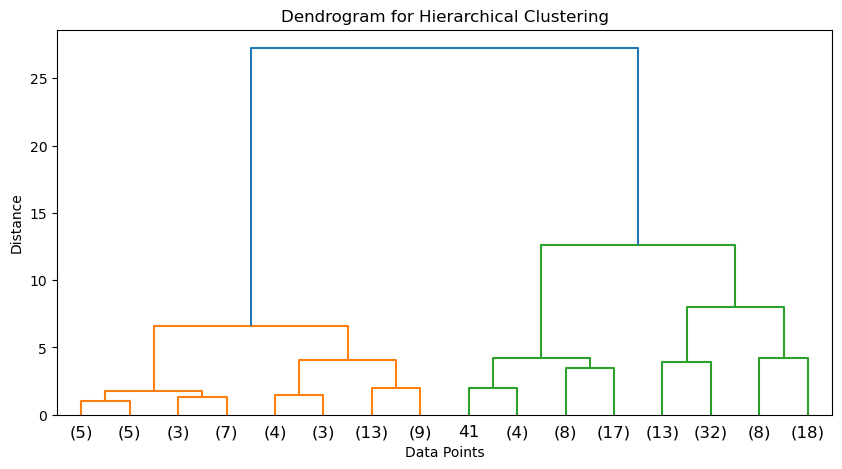

In [37]:
# Dendrogram Visualization
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [39]:
# Applying Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_scaled)

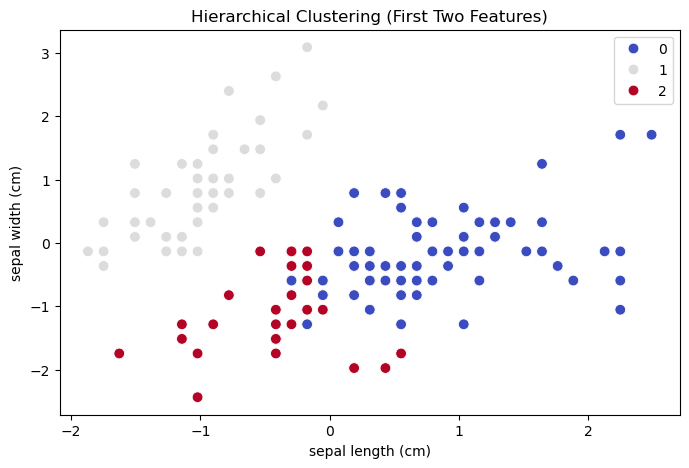

In [41]:
# Visualization of Hierarchical Clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=hierarchical_labels, palette='coolwarm', s=60)
plt.title('Hierarchical Clustering (First Two Features)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()
